# Credit Card Fraud Detection

In this project I have compared various classification models to check which model gives the best result.

Models were built on the imbalanced data and hyperparameters were tuned. Then SMOTE and ADASYN techniques were used to balance the data. Models was tried on both SMOTE and ADASYN data to see which one is producing better result.

Used the following classification models.

* Logistic Regression
* KNN
* Decision Tree
* Random forest
* XGBoost

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection  import cross_val_score


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

## Exploratory data analysis

In [ ]:
df = pd.read_csv('C:/Users/Teja Tetali/OneDrive/Desktop/Project/dataset.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#observe the different feature type present in the data
df.shape


(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Insight:**
* Since the data is PCA transformed all features are expected tobe normally distributed. The data does not have any null value. Each feature has 284807 observations.
* The datatype of the 'Class' variable is int. Since we know that the Class vaiable should be categorical (0: non fraud & 1:fraud), we must change the datatype.

In [ ]:
#Changing the data type of Class

df['Class'] = df['Class'].astype('category')

#Renaming the classes
df['Class'] = df['Class'].cat.rename_categories({1:'Fraudulent',0:'Non_Fraudulent'})

df['Class']

0         Non_Fraudulent
1         Non_Fraudulent
2         Non_Fraudulent
3         Non_Fraudulent
4         Non_Fraudulent
               ...      
284802    Non_Fraudulent
284803    Non_Fraudulent
284804    Non_Fraudulent
284805    Non_Fraudulent
284806    Non_Fraudulent
Name: Class, Length: 284807, dtype: category
Categories (2, object): ['Non_Fraudulent', 'Fraudulent']

Here we will observe the distribution of our classes

In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
print(normal_share)
fraud_share=classes[1]/df['Class'].count()*100
print(fraud_share)

99.82725143693798
0.1727485630620034


In [ ]:
#Creating a df for percentage of each class
class_share = {'Class':['fraudulent','non_fraudulent'],'Percentage':[fraud_share,normal_share]}
class_share = pd.DataFrame(class_share)
class_share.head()

,Class,Percentage
0,fraudulent,0.172749
1,non_fraudulent,99.827251


The data is imbalanced. Only 0.172% of total cases are positive. 

C:\Users\Teja Tetali\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


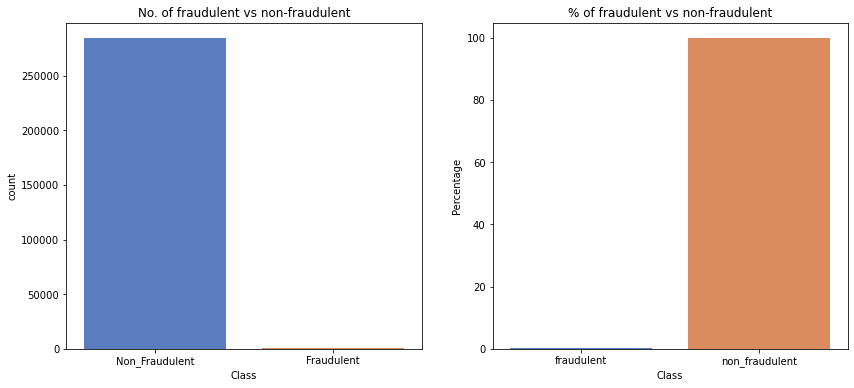

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
sns.set_palette("muted")
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.countplot('Class',data=df)
plt.title('No. of fraudulent vs non-fraudulent')

plt.subplot(122)
sns.barplot(x='Class', y='Percentage',data=class_share)
plt.title('% of fraudulent vs non-fraudulent')
plt.show()


The no. of fraudulent cases are quite insignificant compared to the non-fraudulent cases. This is a highly unbalnced dataset.

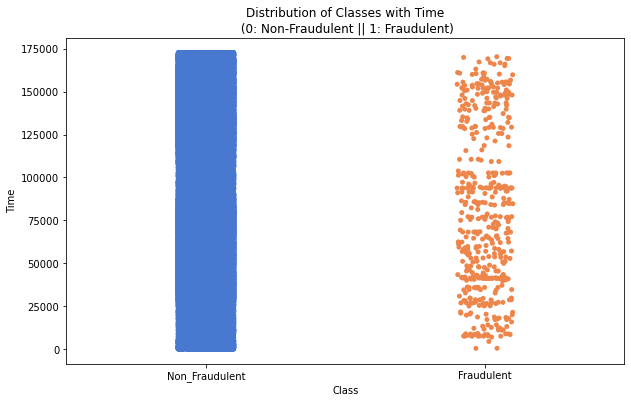

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
#sns.set_palette("muted")
plt.figure(figsize=(10,6))
sns.stripplot(x= 'Class', y= 'Time',data=df)
plt.title('Distribution of Classes with Time\n (0: Non-Fraudulent || 1: Fraudulent)')
plt.show()


**Insight:**
*   From the above plot we observe that there isn't any
particular time interval at which fraudulent transactions happen. It can happen at any time. 
* The Time column is evenly distributed for fraudulent transactions and doesn't seem to have any role in deciding whether a transaction is fraud or not.

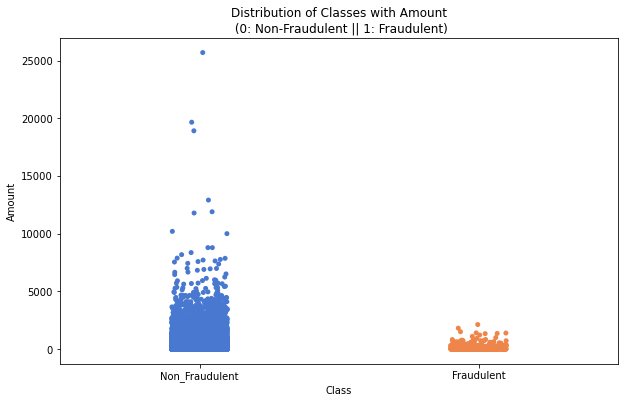

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(10,6))
sns.stripplot(x= 'Class', y= 'Amount',data=df)
plt.title('Distribution of Classes with Amount\n (0: Non-Fraudulent || 1: Fraudulent)')
plt.show()

**Insight:** 

*   The fraudulent transactions do not have any high amount transactions. The maximum amount for a fraudulent transaction is somewhere around $2500. 
 



In [ ]:
# Drop unnecessary columns
# Dropping the column 'Time' since it does not have any impact on deciding a fraud transaction

df=df.drop('Time',axis=1)
df.shape

(284807, 30)

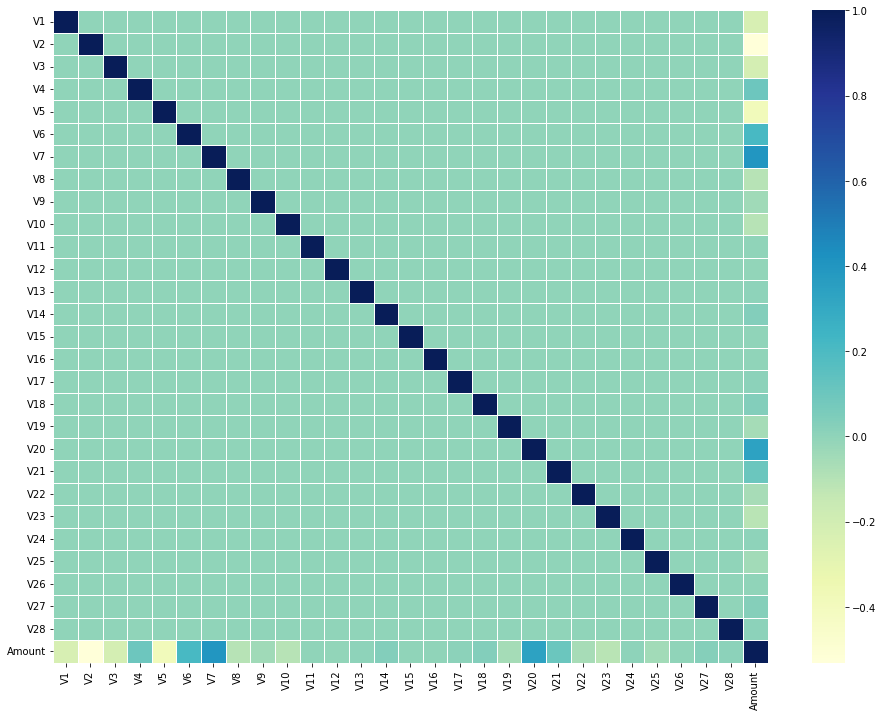

In [ ]:
#Plotting heatmap to check the coorelation

plt.figure(figsize=(16,12))

sns.heatmap(df.corr(),linewidths=0.5,cmap='YlGnBu')

plt.show()

* V7 and V20 seem to have positive correlation with the feature 'Amount'. Since this is a PCA converted data, there isn't much to conclude from the heatmap.

### Splitting the data into train & test data

In [ ]:
y= df.iloc[:,-1] #class variable
X = df.iloc[:,:-1]


In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

#Using stratify=y so that proportion of each class is same in both train and test set

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [ ]:
print('Total count for each class:\n', y.value_counts())
print("\nCount of each class in train data:\n",y_train.value_counts())
print("\nCount of each class in test data:\n",y_test.value_counts())

Total count for each class:
 Non_Fraudulent    284315
Fraudulent           492
Name: Class, dtype: int64

Count of each class in train data:
 Non_Fraudulent    227451
Fraudulent           394
Name: Class, dtype: int64

Count of each class in test data:
 Non_Fraudulent    56864
Fraudulent           98
Name: Class, dtype: int64


### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [ ]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
# Using ‘yeo-johnson’ method since it works with positive and negative values. It is used to improve normality or symmetry


from sklearn.preprocessing import power_transform

X_train = power_transform(X_train,method='yeo-johnson')
X_test = power_transform(X_test,method='yeo-johnson')

In [ ]:
# Converting X_train & X_test back to dataframe
cols = X.columns

X_train = pd.DataFrame(X_train)
X_train.columns = cols

X_test = pd.DataFrame(X_test)
X_test.columns = cols


### **Model performance parameter:**


*   We will use ROC curve and find AUC Score as the performance matrix for the models.
*  ROC curve meausres the performance of the model at different thresholds which will help us find the optimum threshold for the model.



In [ ]:
# Function to plot ROC curve and classification score which will be used for each model

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

def plot_roc(fpr,tpr):
    plt.plot(fpr, tpr, color='green', label='ROC')
    plt.plot([0, 1], [0, 1], color='yellow', linestyle='--')
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

def clf_score(clf):
    prob = clf.predict_proba(X_test)
    prob = prob[:, 1]
    auc = roc_auc_score(y_test, prob)    
    print('AUC: %.2f' % auc)
    fpr, tpr, thresholds = roc_curve(y_test,prob, pos_label='Non_Fraudulent')
    plot_roc(fpr,tpr)
    predicted=clf.predict(X_test)
    report = classification_report(y_test, predicted)
    print(report)
    return auc


## Model Building on the imbalanced dataset


**Note**:
- Due to time constraint we have choosen few parameters to tune in each model.

- For cross validation, GridsearchCV and Stratified Kfold (cross_val_score) has been used.

### Logistic Regression

In [ ]:
# Logistic Regression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression #import the package
from sklearn.model_selection import GridSearchCV


In [ ]:
num_C = [0.001,0.01,0.1,1,10,100] #--> list of values

for cv_num in num_C:
  clf = LogisticRegression(penalty='l2',C=cv_num,random_state = 0)
  clf.fit(X_train, y_train)
  print('C:', cv_num)
  print('Coefficient of each feature:', clf.coef_)
  print('Training accuracy:', clf.score(X_train, y_train))
  print('Test accuracy:', clf.score(X_test, y_test))
  print('')

C: 0.001
Coefficient of each feature: [[ 0.05827245 -0.03231278  0.15258413 -0.2303827  -0.03251785  0.04418223
   0.06092596  0.1053219   0.11901376  0.23577848 -0.17897772  0.23620764
   0.0429589   0.40046756  0.01684527  0.118289    0.11039617  0.00086577
   0.00221737 -0.01263307 -0.02883974 -0.03215089  0.03304381  0.02416244
   0.00155655 -0.01639013 -0.00758294  0.00107762  0.01629961]]
Training accuracy: 0.9990344313019817
Test accuracy: 0.9988939995084443

C: 0.01
Coefficient of each feature: [[ 0.15546705  0.08584789  0.26579153 -0.5753725  -0.01738138 -0.03487857
   0.11891721  0.19132465  0.16632621  0.22402918 -0.16014372  0.44675414
   0.14777179  0.65203773  0.11114447  0.20586739  0.02118281 -0.0613255
   0.05790786  0.00283988 -0.04986379 -0.1719924   0.0859131  -0.00722106
  -0.04617946 -0.0330326   0.05303883  0.03400267 -0.00360083]]
Training accuracy: 0.999223156092958
Test accuracy: 0.9990695551420246

C: 0.1
Coefficient of each feature: [[ 0.21452937  0.22263954



*   The best C value is the one for which the difference between train and test score is the least.
*   In our case the best value of C=0.1



In [ ]:
#perform cross validation

grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}  # l2 ridge

lsr = LogisticRegression()
clf_lsr_cv = GridSearchCV(lsr,grid,cv=3,scoring='roc_auc')
clf_lsr_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_lsr_cv.best_params_)
print("accuracy :",clf_lsr_cv.best_score_)

#perform hyperparameter tuning



#print the optimum value of hyperparameters

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.9803975962273005




*   Best parameters :  {'C': 0.01, 'penalty': 'l2'}




AUC: 0.98


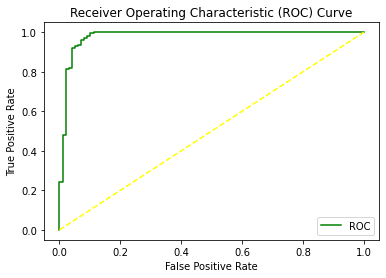

                precision    recall  f1-score   support

    Fraudulent       0.87      0.54      0.67        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.93      0.77      0.83     56962
  weighted avg       1.00      1.00      1.00     56962



0.9799370930139079

In [ ]:
# Fitting the model with best parameters .

lsr_best = LogisticRegression(penalty='l2',C=0.01,random_state = 0)
lsr_clf = lsr_best.fit(X_train,y_train)
clf_score(lsr_clf)



*   The AUC score is 0.98 but the data is clearly overfitting due to the imbalanced data.




### KNN

In [ ]:
#K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection  import cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error

# Taking only odd integers as K values to apply the majority rule. 
k_range = np.arange(1, 20, 2)
scores = [] #to store cross val score for each k
k_range

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [ ]:
# Finding the best k with stratified K-fold method. 
# We will use cv=3 in cross_val_score to specify the number of folds in the (Stratified)KFold.
from sklearn.model_selection import StratifiedKFold
#skfold=StratifiedKFold(n_splits=5)
model=KNeighborsClassifier()
model.fit(X_train,y_train)
#scores=cross_val_score(model,X,y,cv=skfold)
#print(scores)

KNeighborsClassifier()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
metrics.accuracy_score(y_pred,y_test)

0.9995084442259752

In [ ]:
#Fitting the best parameter to the model
# 3 fold cross validation with K=3

knn = KNeighborsClassifier(n_neighbors=3)

knn_clf = knn.fit(X_train,y_train)



AUC: 0.94


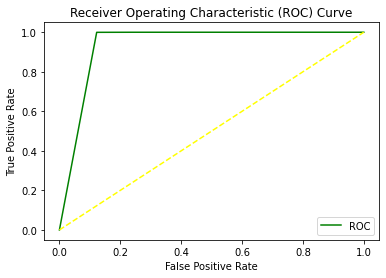

                precision    recall  f1-score   support

    Fraudulent       0.96      0.77      0.85        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.98      0.88      0.93     56962
  weighted avg       1.00      1.00      1.00     56962



0.938721047999954

In [ ]:
# Checking AUC 

clf_score(knn_clf)


* The KNN model with imbalanced data gives AUC of 0.94  which is pretty good but recall is 0.77 which is the score we should look to improve in this case.

### Decision Tree

In [ ]:
#importing libraries

from sklearn import tree
from pprint import pprint
clf = tree.DecisionTreeClassifier()

In [ ]:
clf.fit(X_train,y_train)

# score_tree = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5, n_jobs=-1)
# depth_score.append(score_tree.mean())
# print(depth_score)

DecisionTreeClassifier()

In [ ]:
clf.tree_.max_depth

25

In [ ]:
Y_pred=clf.predict(X_test)

In [ ]:
Y_pred

array(['Non_Fraudulent', 'Non_Fraudulent', 'Non_Fraudulent', ...,
       'Non_Fraudulent', 'Non_Fraudulent', 'Non_Fraudulent'], dtype=object)

In [ ]:
metrics.accuracy_score(Y_pred,y_test)

0.9991222218320986

AUC: 0.86


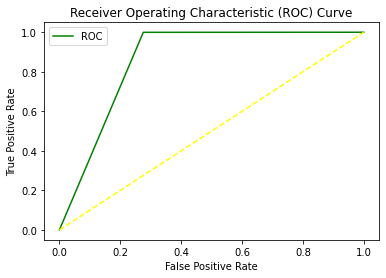

                precision    recall  f1-score   support

    Fraudulent       0.76      0.72      0.74        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.88      0.86      0.87     56962
  weighted avg       1.00      1.00      1.00     56962



0.862042661043033

In [ ]:
clf_score(clf)

### Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
r_clf=RandomForestClassifier()

In [ ]:
r_clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
Y_pred=r_clf.predict(X_test)

In [ ]:
metrics.accuracy_score(Y_pred,y_test)

0.9995611109160493

AUC: 0.96


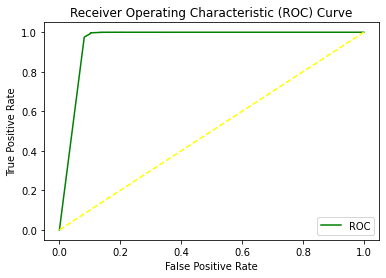

                precision    recall  f1-score   support

    Fraudulent       0.99      0.76      0.86        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.99      0.88      0.93     56962
  weighted avg       1.00      1.00      1.00     56962



0.9577908945654796

In [ ]:
clf_score(r_clf)

### XgBoost

In [ ]:
from xgboost import XGBClassifier
x_clf=XGBClassifier()

In [ ]:
x_clf.fit(X_train,y_train)

C:\Users\Teja Tetali\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:51:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
Y_pred=x_clf.predict(X_test)

In [ ]:
metrics.accuracy_score(Y_pred,y_test)

0.9995786664794073

AUC: 0.98


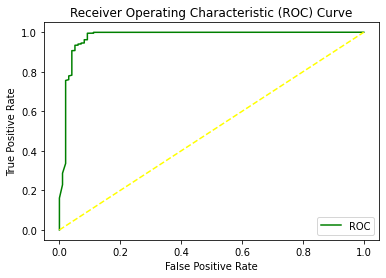

                precision    recall  f1-score   support

    Fraudulent       0.99      0.77      0.86        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.99      0.88      0.93     56962
  weighted avg       1.00      1.00      1.00     56962



0.9767572898602321

In [ ]:
clf_score(x_clf)

### Handling class imbalance

In [ ]:
from imblearn.over_sampling import *

#### SMOTE

In [ ]:
sm=SMOTE()

In [ ]:
X_sm, y_sm= sm.fit_resample(X_train,y_train)

In [ ]:
X_sm.shape

(454902, 29)

In [ ]:
X_train.shape

(227845, 29)

#### ADASYN

In [ ]:
ada=ADASYN()

In [ ]:
X_ada, y_ada= ada.fit_resample(X_train,y_train)

In [ ]:
X_train.shape

(227845, 29)

In [ ]:
X_ada.shape

(454925, 29)

### Linear Regression

#### LR with SMOTE

In [ ]:
num_C = [0.001,0.01,0.1,1,10,100] #--> list of values

for cv_num in num_C:
  clf = LogisticRegression(penalty='l2',C=cv_num,random_state = 0)
  clf.fit(X_sm, y_sm)
  print('C:', cv_num)
  print('Coefficient of each feature:', clf.coef_)
  print('Training accuracy:', clf.score(X_train, y_train))
  print('Test accuracy:', clf.score(X_test, y_test))
  print('')

C: 0.001
Coefficient of each feature: [[ 0.06618373  0.1672393   0.22365516 -1.31434053  0.02135414  0.16619575
   0.01596526  0.53803163  0.36825136  0.76546874 -0.5527277   0.8490827
   0.3387649   0.9127308   0.12861687  0.33695486  0.15870737  0.0630338
   0.02145114  0.04526096 -0.11209463 -0.33323573  0.0769845  -0.05307892
  -0.0085371   0.32433126 -0.0405803  -0.11711391 -0.03621341]]
Training accuracy: 0.974206148917027
Test accuracy: 0.9748779888346617

C: 0.01
Coefficient of each feature: [[-0.23177298  0.44354548  0.1594606  -1.66254971  0.0075453   0.14841749
   0.12734294  0.86946155  0.67768928  1.38788649 -0.8286131   1.32013619
   0.33639935  1.30548214  0.18643092  0.64008254  0.60124662  0.22620738
  -0.07604777  0.13140958 -0.19138381 -0.39430345  0.09878141 -0.04011072
   0.08305496  0.38530043 -0.0214814  -0.15183737  0.00844828]]
Training accuracy: 0.9714191665386557
Test accuracy: 0.9723148765843896

C: 0.1
Coefficient of each feature: [[-3.35167823e-01  5.34971

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.9803975962273005
AUC: 0.98


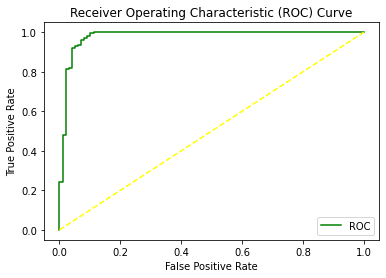

                precision    recall  f1-score   support

    Fraudulent       0.87      0.54      0.67        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.93      0.77      0.83     56962
  weighted avg       1.00      1.00      1.00     56962



0.9799370930139079

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}  # l2 ridge

lsr = LogisticRegression()
clf_lsr_cv = GridSearchCV(lsr,grid,cv=3,scoring='roc_auc')
clf_lsr_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_lsr_cv.best_params_)
print("accuracy :",clf_lsr_cv.best_score_)
clf_score(clf_lsr_cv)

#### LR with ADASYN

In [ ]:
num_C = [0.001,0.01,0.1,1,10,100] #--> list of values

for cv_num in num_C:
  clf = LogisticRegression(penalty='l2',C=cv_num,random_state = 0)
  clf.fit(X_ada, y_ada)
  print('C:', cv_num)
  print('Coefficient of each feature:', clf.coef_)
  print('Training accuracy:', clf.score(X_train, y_train))
  print('Test accuracy:', clf.score(X_test, y_test))
  print('')

C: 0.001
Coefficient of each feature: [[-0.00301636  0.49560981  0.2717385  -1.65930782  0.11286097  0.19688628
  -0.02530165  0.80114395  0.57271747  1.25132869 -0.7625757   1.10770075
   0.2495216   1.26463798  0.23934597  0.49335276  0.35823476  0.1375707
  -0.05187803  0.16916794 -0.09490053 -0.4045881   0.15425063 -0.00518139
   0.03805519  0.36223292 -0.02111007 -0.25319201  0.05979239]]
Training accuracy: 0.9109262876078036
Test accuracy: 0.910887960394649

C: 0.01
Coefficient of each feature: [[-0.4007395   0.94836446  0.18211038 -2.0981952   0.1254824   0.15596685
   0.11921166  1.1993774   1.02307237  2.14063051 -1.10401939  1.67900996
   0.2124224   1.73500854  0.32571043  0.85686193  0.94460211  0.34216798
  -0.18665486  0.35553745 -0.19642379 -0.45809285  0.20254228  0.00679451
   0.15950852  0.41024001  0.03299021 -0.31796156  0.12850056]]
Training accuracy: 0.909859773091356
Test accuracy: 0.9096941820863031

C: 0.1
Coefficient of each feature: [[-0.51878646  1.07511396 

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.9803975962273005
AUC: 0.98


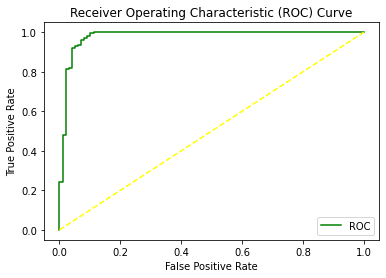

                precision    recall  f1-score   support

    Fraudulent       0.87      0.54      0.67        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.93      0.77      0.83     56962
  weighted avg       1.00      1.00      1.00     56962



0.9799370930139079

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}  # l2 ridge

lsr = LogisticRegression()
clf_lsr_cv = GridSearchCV(lsr,grid,cv=3,scoring='roc_auc')
clf_lsr_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_lsr_cv.best_params_)
print("accuracy :",clf_lsr_cv.best_score_)
clf_score(clf_lsr_cv)

#### Decision Tree with SMOTE

In [ ]:
from sklearn import tree
from pprint import pprint
clf = tree.DecisionTreeClassifier()
clf.fit(X_sm,y_sm)
Y_pred=clf.predict(X_test)
metrics.accuracy_score(Y_pred,y_test)

0.99750711000316

AUC: 0.87


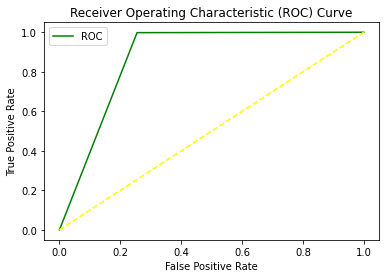

                precision    recall  f1-score   support

    Fraudulent       0.38      0.74      0.51        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.69      0.87      0.75     56962
  weighted avg       1.00      1.00      1.00     56962



0.871420209192287

In [ ]:
clf_score(clf)

#### Decision Tree with ADASYN

In [ ]:
from sklearn import tree
from pprint import pprint
clf = tree.DecisionTreeClassifier()
clf.fit(X_ada,y_ada)
Y_pred=clf.predict(X_test)
metrics.accuracy_score(Y_pred,y_test)

0.9977528878901724

AUC: 0.86


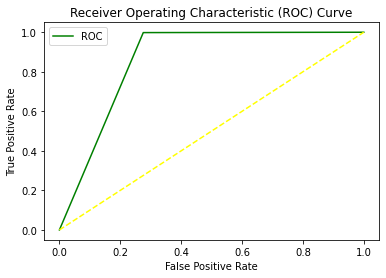

                precision    recall  f1-score   support

    Fraudulent       0.41      0.72      0.53        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.71      0.86      0.76     56962
  weighted avg       1.00      1.00      1.00     56962



0.8613568141099996

In [ ]:
clf_score(clf)

#### Random Forest with SMOTE

In [ ]:
r_clf=RandomForestClassifier()
r_clf.fit(X_sm,y_sm)
Y_pred=r_clf.predict(X_test)
metrics.accuracy_score(Y_pred,y_test)


0.9995611109160493

AUC: 0.98


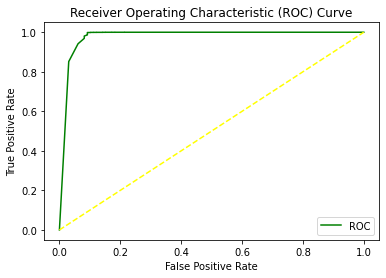

                precision    recall  f1-score   support

    Fraudulent       0.92      0.82      0.86        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.96      0.91      0.93     56962
  weighted avg       1.00      1.00      1.00     56962



0.9781335596281282

In [ ]:
clf_score(r_clf)

#### Random Forest with ADASYN

In [ ]:
r_clf=RandomForestClassifier()
r_clf.fit(X_ada,y_ada)
Y_pred=r_clf.predict(X_test)
metrics.accuracy_score(Y_pred,y_test)


0.9995435553526912

AUC: 0.97


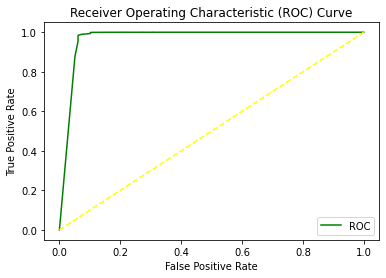

                precision    recall  f1-score   support

    Fraudulent       0.92      0.81      0.86        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.96      0.90      0.93     56962
  weighted avg       1.00      1.00      1.00     56962



0.9700704617102891

In [ ]:
                            clf_score(r_clf)

#### XgBoost with SMOTE

In [ ]:
x_clf=XGBClassifier()
x_clf.fit(X_sm,y_sm)
Y_pred=x_clf.predict(X_test)
metrics.accuracy_score(Y_pred,y_test)



C:\Users\Teja Tetali\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:06:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9991397773954567

AUC: 0.98


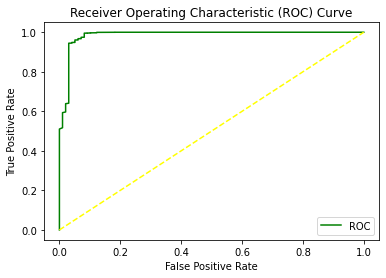

                precision    recall  f1-score   support

    Fraudulent       0.70      0.87      0.78        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.85      0.93      0.89     56962
  weighted avg       1.00      1.00      1.00     56962



0.984969867237835

In [ ]:
clf_score(x_clf)

#### XgBoost with ADASYN

In [ ]:
x_clf=XGBClassifier()
x_clf.fit(X_ada,y_ada)
Y_pred=x_clf.predict(X_test)
metrics.accuracy_score(Y_pred,y_test)


C:\Users\Teja Tetali\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:08:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9989817773252344

AUC: 0.98


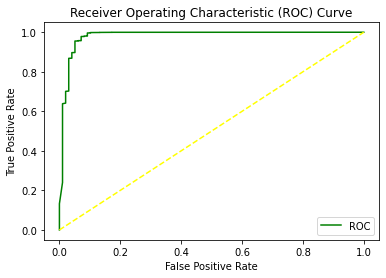

                precision    recall  f1-score   support

    Fraudulent       0.66      0.86      0.74        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.83      0.93      0.87     56962
  weighted avg       1.00      1.00      1.00     56962



0.9811528473235102

In [ ]:
clf_score(x_clf)

#### KNN with SMOTE

In [ ]:
model=KNeighborsClassifier()
model.fit(X_sm,y_sm)
y_pred=model.predict(X_test)
metrics.accuracy_score(y_pred,y_test)


0.9980864435939749

AUC: 0.94


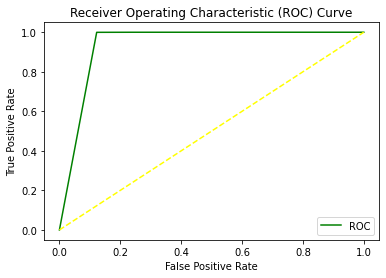

                precision    recall  f1-score   support

    Fraudulent       0.96      0.77      0.85        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.98      0.88      0.93     56962
  weighted avg       1.00      1.00      1.00     56962



0.938721047999954

In [ ]:
clf_score(knn_clf)

#### KNN with ADASYN

In [ ]:
model=KNeighborsClassifier()
model.fit(X_ada,y_ada)
y_pred=model.predict(X_test)
metrics.accuracy_score(y_pred,y_test)


0.9980688880306169

AUC: 0.94


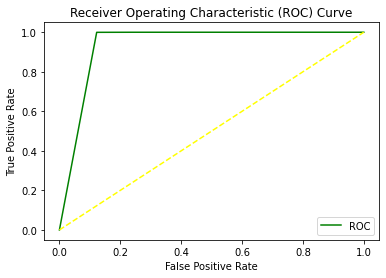

                precision    recall  f1-score   support

    Fraudulent       0.96      0.77      0.85        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.98      0.88      0.93     56962
  weighted avg       1.00      1.00      1.00     56962



0.938721047999954

In [ ]:
clf_score(knn_clf)